<a href="https://colab.research.google.com/github/b-guedes/Projetos-Portfolio/blob/main/Projeto_Ra%C3%A7%C3%A3o_Gatos_BeautifulSoup.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Raspagem de dados com BeautifulSoup

Neste projeto, usaremos a biblioteca do BeautifulSoup para realizar a raspagem de dados de um site e armazená-los em uma tabela no formato de arquivo CSV - comumente utilizado para análises de dados em diferentes ferramentas.

## Introdução

A raspagem de dados é uma técnica importante para diversas áreas atualmente seja, por exemplo, na área de inteligência de negócios (Business Intelligence) ou acompanhamento de políticas públicas, a coleta de dados disponíveis na internet é um recurso essencial para ser explorado e utilizado por qualquer área nos dias atuais.

Neste projeto, irei demonstrar a usabilidade da ferramenta [BeautifulSoup](https://beautiful-soup-4.readthedocs.io/en/latest/) na linguagem [Python](https://docs.python.org/3/) dentro do ambiente virtual do [Google Colab](https://colab.research.google.com/) para a extração de informações de páginas da internet para tabelas, ou seja, transformar texto em dados estruturados!

## O projeto

Para este projeto, escolhi fazer a raspagem de dados de algo que está presente no meu cotidiano, os meus gatos e sua alimentação! Como tenho dois gatos em casa, achei que eles dariam cobaias perfeitas para esse projeto de raspagem do site da loja [Cobasi](https://www.cobasi.com.br/).

![](https://www.barkandsqueak.com/wp-content/uploads/2017/10/cats-eating.jpg)


Gosto de saber o quanto estou gastando com a alimentação deles e ter uma noção do aumento ou diminuição dos preços para entender o impacto disso no orçamento da casa, e para fazer isto nada melhor do que um acompanhamento contínuo no preço das rações, não é mesmo?!



Para fazer esse acompanhamento dentro do projeto, é preciso acessar o site que se deseja, fazer a raspagem dos dados e examinar o código do mesmo para entendermos onde estão as informações que desejamos.

Dessa maneira, e respeitando a alimentação deles, comecei por ajustar o filtro do site para buscar apenas rações de **1)** gatos adultos **2)** secas e **3)** super premium natural. Obtemos, assim, o seguinte resultado:

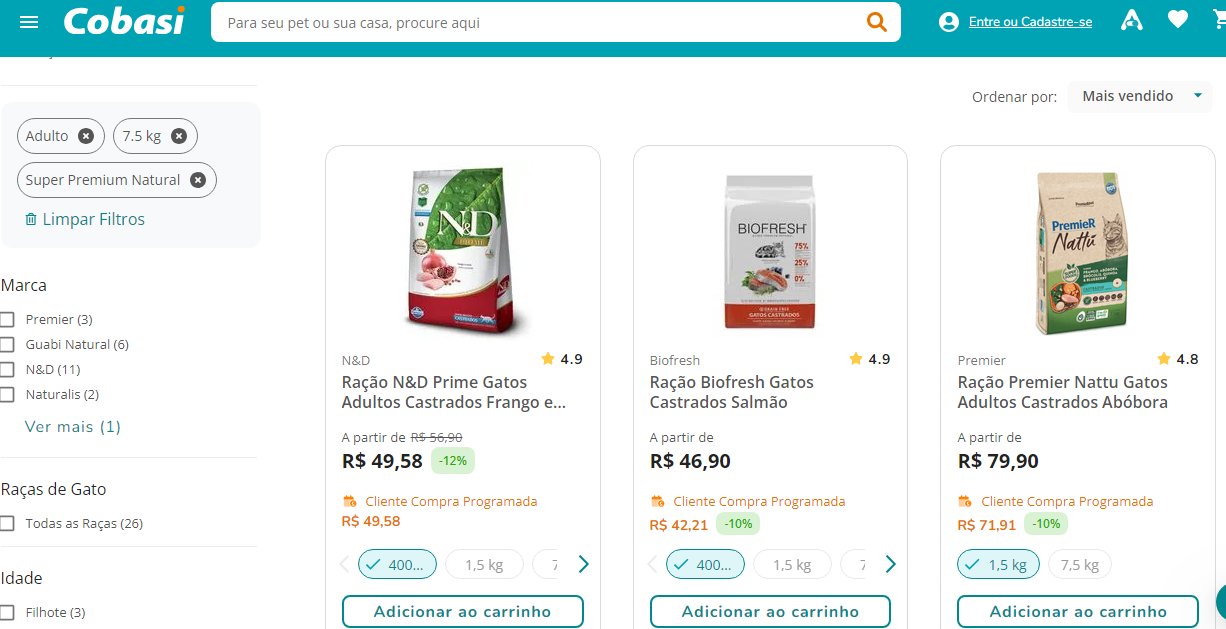

Com o filtro selecionado, é hora de analisar os elementos do código que me interessam no site, neste caso, as informações de cada ração. Para isso, acionamos o modo desenvolvedor do navegador, selecionamos o item que desejamos ver o código e pronto!

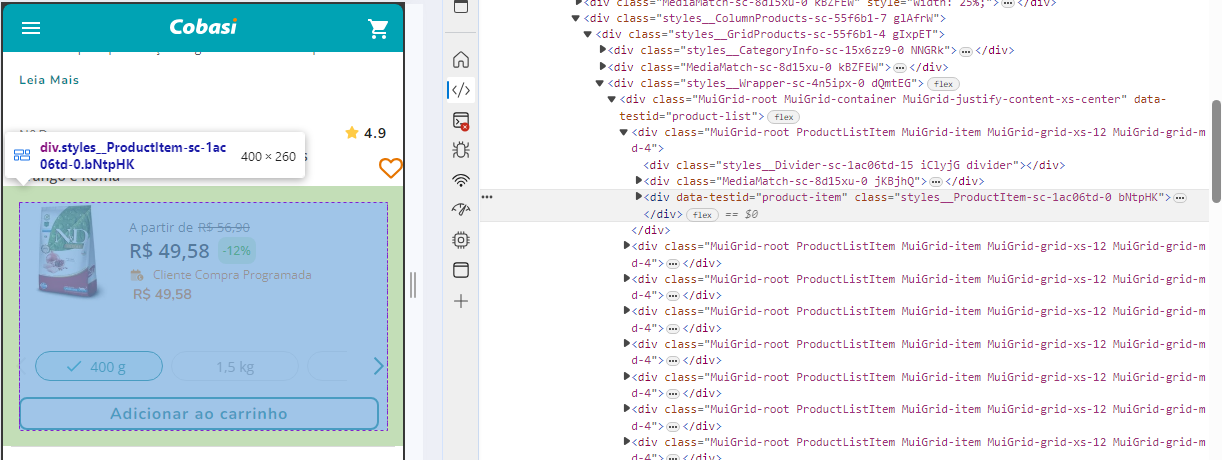

Dessa forma, podemos fazer nossa análise do objeto e entender o que precisamos passar para o BeautifulSoup para que ele pegue apenas as informações necessárias.

Ao final deste projeto, analisando as informações acima do que o site fornece, os dados vão ser organizados da seguinte maneira em uma tabela contendo:


*   **racao_loja**:  Indica em qual loja as informações foram coletadas;
*   **racao_nome**: Contém o nome da ração;
*   **racao_marca**: Contém o nome da marca da ração;
*   **racao_nota**: A nota de avaliação feita pelos usuários àquela ração;
*   **racao_preco**: O preço da ração conforme o preço;
*   **racao_peso**: O peso do pacote da ração selecionada;
*   **data_acesso**: A data em que as informações foram coletadas.

## O código


Com os devidos parâmetros estabelecidos, é chegada a hora de colocar as idéias do projeto em código!

Os passos que se seguirão serão os seguintes: **1)** Importação das bibliotecas necessárias; **2)** captura do código da página selecionada feita pelo BeautifulSoup e transformação dele em texto; **3)** coleta e organização dos dados extraídos com um *loop for* alocados em listas; **4)** criação de um DataFrame com os dados coletados; e **5)** salvar o DataFrame em um arquivo CSV.

In [1]:
#importanto os pacotes que serão utilizados no projeto
from requests import get
from bs4 import BeautifulSoup

import pandas as pd
import numpy as np

import time
import re
import datetime

In [2]:
url = 'https://www.cobasi.com.br/c/gatos/racao/racao-seca?terms=/gatos/racao/racao-seca/7%40dot%405%20kg/Adulto/Super%20Premium%20Natural?map=c,c,c,specificationFilter_291,specificationFilter_297,specificationFilter_470&page=1'
response = get(url)

# usando os parâmetros do Beautifulsoup para transformar a página em um objeto
soup = BeautifulSoup(response.text, 'html.parser')

# criando objetos individuais para cada objeto (ração), para que possam ser analisadas em um lastro de repetição.
racao_containers= soup.find_all(class_= 'bNtpHK')

# conferindo quantos objetos existem na página
len(racao_containers)

21

In [3]:
#analisando a árvore do objeto para entender como extrair as informações necessárias
primeira_racao = racao_containers[0]

print(primeira_racao.prettify())

<div class="styles__ProductItem-sc-1ac06td-0 bNtpHK" data-testid="product-item">
 <a href="/racao-farmina-n-d-prime-gatos-adultos-castrados-frango-e-roma-3635251/p?idsku=635251">
  <div class="styles__ImageBlock-sc-1ac06td-1 eKuMsG">
   <img alt="Ração N&amp;amp;D Prime Gatos Adultos Castrados Frango e Romã" height="180" loading="lazy" src="https://cobasi.vteximg.com.br/arquivos/ids/211131-180-180/Racao-N-amp-D-Prime-Gatos-Adultos-Castrado-Frango.jpg?v=638122542419470000" width="180"/>
  </div>
  <div class="styles__InfoBox-sc-1ac06td-5 brVZsi">
   <div class="MediaMatch-sc-8d15xu-0 jKBjhQ">
    <div class="styles__Highlights-sc-1ac06td-7 ZOUgn">
    </div>
    <div class="styles__Highlights-sc-1ac06td-7 ZOUgn">
    </div>
   </div>
   <div class="MediaMatch-sc-8d15xu-0 kBZFEW">
    <div class="styles__Header-sc-1ac06td-2 cKLKQc">
     <div class="styles__BrandName-sc-1ac06td-3 bNiXcY">
      N&amp;D
     </div>
     <div class="styles__Rating-sc-1ac06td-12 kISiHB">
      <span>
      

In [4]:
# criando listas para cada valor que buscamos para montar a tabela final
racao_loja = []
racao_nome = []
racao_marca = []
racao_nota = []
racao_preco = []
racao_peso = []
data_acesso = []

#criando um lastro for para pegar cada informação de cada objeto e colocar nas listas criadas anteriormente
for item in range(len(racao_containers)):
    racao_loja.append(re.findall('www.(.*).com', url))
    racao_nome.append(racao_containers[item].find(class_ = 'dPsqyZ').get_text())
    racao_marca.append(racao_containers[item].find(class_ = 'bNiXcY').get_text())
    racao_nota.append(racao_containers[item].find(class_= 'kISiHB').get_text())
    if racao_containers[item].find(class_ = 'card-price') is not None: #linha para coletar itens que possam estar indisponíveis no site
       racao_preco.append(racao_containers[item].find(class_ = 'card-price').get_text()[3:].replace(',', '.'))
    else:
       racao_preco.append('na')
    if racao_containers[item].find(class_ = 'bOmFEM') is not None: #linha para coletar itens que possam estar indisponíveis no site
       racao_peso.append(racao_containers[item].find(class_= 'bOmFEM').get_text())
    else:
       racao_peso.append('na')
    data_acesso.append(datetime.date.today().strftime('%Y-%m-%d'))
time.sleep(2) # tempo para carregar cada vez e não sobrecarregar o server

In [7]:
#criando a tabela no Pandas
racao_gatos = pd.DataFrame({
    'racao_loja': racao_loja,
    'racao_nome': racao_nome,
    'racao_marca': racao_marca,
    'racao_nota': racao_nota,
    'racao_preco': racao_preco,
    'racao_peso': racao_peso,
    'data_acesso': data_acesso
})

#vendo o resultado final
racao_gatos.head()

,racao_loja,racao_nome,racao_marca,racao_nota,racao_preco,racao_peso,data_acesso
0,[cobasi],Ração N&D Prime Gatos Adultos Castrados Frango...,N&D,4.9,49.58,400 g,2024-01-29
1,[cobasi],Ração Biofresh Gatos Castrados Salmão,Biofresh,4.9,46.90,400 g,2024-01-29
2,[cobasi],Ração Premier Nattu Gatos Adultos Castrados Ab...,Premier,4.8,79.90,"1,5 kg",2024-01-29
3,[cobasi],Ração Guabi Natural Gato Adulto Castrado Frang...,Guabi Natural,4.8,92.90,"1,5 kg",2024-01-29
4,[cobasi],Ração N&D Ancestral Grain Gatos Adultos Castrados,N&D,4.9,49.00,400 g,2024-01-29


In [6]:
#criando arquivo csv do resultado
racao_gatos.to_csv('racao_gatos.csv', index=False)

## Conclusões

Ao fim deste projeto, foi possível obter de maneira simples e rápida informações úteis que podem ser coletadas diretamente de páginas da internet.

Com isso, foi possível montar um conjunto de dados que pode ser utilizado em diferentes projetos de análise dados, por exemplo, como uma análise da variação de preço ao longo do tempo das rações selecionadas ou ainda a avaliação dos consumidores, o preço médio por ano de cada ração, entre outras.

Ainda se pode perguntar qual a real utilidade de programar algo assim para uma simples coleta de dados tão visíveis, mas é factível entendermos que mesmo as tarefas mais simples, quando feitas por humanos, podem ser feitas de maneira equivocada, por inúmeras razões, e quando se trata da coleta de dados qualquer dado falso pode ser um grande problema e distorção! Por essa razão, automatizar a coleta de dados é sempre uma boa solução para manter a consistência dos dados e, por consequência, das análises feitas através deles, tornando todo o processo mais confiável e ágil.

Este projeto foi feito com uma pequena base de dados, mas ele é facilmente escalonável. O poder da robustez das ferramentas aqui demonstradas é de conhecimento público e totalmente testáveis por qualquer um. De outra forma, poderíamos ainda aliar o projeto a uma base de dados em SQL ou NoSQL para escalonar o projeto, enfim, os desdobramentos podem ser muitos, e este projeto não pretende esgotar essas possibilidades, mas mostrar uma parte dessas possibilidades.